# Penjelasan Atribut Dataset

1. **UTC**
   - **Timestamp UTC seconds:** Waktu pengambilan data yang dicatat dalam detik sejak Epoch (UTC). Ini membantu melacak kapan setiap pengukuran dilakukan.

2. **Temperature[C]**
   - **Air Temperature:** Suhu udara yang diukur dalam derajat Celsius. Suhu ini bisa dipengaruhi oleh lingkungan sekitar dan bisa memberikan indikasi adanya kebakaran jika suhu meningkat drastis.

3. **Humidity[%]**
   - **Air Humidity:** Kelembaban udara yang diukur dalam persentase. Kelembaban bisa mempengaruhi cara penyebaran asap atau partikel lainnya di udara.

4. **TVOC[ppb]**
   - **Total Volatile Organic Compounds:** Total konsentrasi senyawa organik volatil di udara yang diukur dalam satuan bagian per miliar (ppb). Senyawa ini bisa berasal dari sumber kebakaran dan memberikan indikasi adanya asap.

5. **eCO2[ppm]**
   - **CO2 Equivalent Concentration:** Konsentrasi setara karbon dioksida yang dihitung dari berbagai nilai seperti TVOC, diukur dalam bagian per juta (ppm). Nilai ini memberikan gambaran tentang jumlah gas-gas lain yang setara dengan CO2, yang bisa meningkat jika ada kebakaran.

6. **Raw H2**
   - **Raw Molecular Hydrogen:** Konsentrasi hidrogen molekuler yang diukur secara mentah, tanpa kompensasi untuk bias atau suhu. Hidrogen dapat terdeteksi dalam jumlah kecil saat terjadi pembakaran atau reaksi kimia lainnya.

7. **Raw Ethanol**
   - **Raw Ethanol Gas:** Konsentrasi gas etanol yang diukur secara mentah. Etanol dapat muncul sebagai produk pembakaran atau sebagai hasil dari bahan kimia lainnya.

8. **Pressure[hPa]**
   - **Air Pressure:** Tekanan udara yang diukur dalam hectopascals (hPa). Tekanan udara dapat mempengaruhi bagaimana asap dan gas lainnya bergerak di dalam suatu ruangan.

9. **PM1.0**
   - **Particulate Matter < 1.0 µm:** Konsentrasi partikel yang berukuran lebih kecil dari 1.0 mikrometer (µm). Partikel-partikel ini sangat kecil dan dapat dihasilkan oleh asap atau pembakaran.

10. **PM2.5**
    - **Particulate Matter < 2.5 µm:** Konsentrasi partikel yang berukuran lebih kecil dari 2.5 mikrometer (µm). Partikel ini juga sangat kecil dan sering dikaitkan dengan polusi udara atau kebakaran.

11. **NC0.5**
    - **Number Concentration of Particulate Matter < 0.5 µm:** Konsentrasi jumlah partikel dengan ukuran lebih kecil dari 0.5 mikrometer (µm). Ini memberikan gambaran tentang jumlah partikel sangat kecil di udara.

12. **NC1.0**
    - **Number Concentration of Particulate Matter < 1.0 µm:** Konsentrasi jumlah partikel dengan ukuran lebih kecil dari 1.0 mikrometer (µm).

13. **NC2.5**
    - **Number Concentration of Particulate Matter < 2.5 µm:** Konsentrasi jumlah partikel dengan ukuran lebih kecil dari 2.5 mikrometer (µm).

14. **CNT**
    - **Sample Counter:** Penghitung sampel yang diambil, membantu melacak urutan pengukuran.

15. **Fire Alarm**
    - **Ground Truth (1/0):** Indikator yang menunjukkan apakah ada kebakaran atau tidak. Nilai "1" menunjukkan bahwa ada kebakaran dan alarm kebakaran seharusnya berbunyi, sedangkan "0" menunjukkan tidak ada kebakaran.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
import timeit

from sklearn.model_selection import KFold # Library untuk penerapan KFold Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # Library untuk menampilkan nilai pengujian Cross Validation (nilai return nya berupa array)
from sklearn.model_selection import cross_validate # ...
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report # Menampilkan hasil tes
import warnings
warnings.filterwarnings('ignore')

In [2]:
smoke = pd.read_csv('/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv')
smoke

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [3]:
smoke = smoke.drop(columns = 'Unnamed: 0')
smoke

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
smoke.shape

(62630, 15)

In [5]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [6]:
smoke.corr().style.background_gradient(cmap = 'viridis')

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
UTC,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.105304,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916


In [7]:
smoke.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [8]:
x = smoke.drop(['Fire Alarm'], axis=1)
y = smoke['Fire Alarm']

In [9]:
start = timeit.default_timer()

kfold = KFold(n_splits=5, shuffle=True, random_state=3)

In [10]:
svm = SVC()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

print(f"Jumlah data pelatihan: {x_train.shape[0]}")
print(f"Jumlah data uji: {x_test.shape[0]}")

Jumlah data pelatihan: 50104
Jumlah data uji: 12526


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
cv_score_svm = cross_val_score(svm, x_train, y_train, cv=kfold, scoring="accuracy")

print('Nilai akurasi tiap fold: {}'.format(cv_score_svm))
print('Nilai akurasi rata-rata: {}'.format(cv_score_svm.mean()))

Nilai akurasi tiap fold: [0.99980042 0.99950105 0.99970063 0.99940126 0.9996008 ]
Nilai akurasi rata-rata: 0.999600830272396


In [14]:
params = {'kernel': ['linear', 'poly', 'rbf']}

svm_classifierCV = GridSearchCV(SVC(), params, cv= kfold, scoring= 'accuracy')
svm_classifierCV.fit(x_train,y_train)

print('Parameter terbaik adalah {0} \ndengan nilai akurasi pada data training: {1}'.format(svm_classifierCV.best_params_, svm_classifierCV.best_score_))

Parameter terbaik adalah {'kernel': 'rbf'} 
dengan nilai akurasi pada data training: 0.999600830272396


In [15]:
pred = svm_classifierCV.predict(x_test)

print(classification_report(y_test, pred))

stop = timeit.default_timer()

print('Waktu eksekusi: ', stop - start)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3557
           1       1.00      1.00      1.00      8969

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Waktu eksekusi:  74.20436349299996


In [16]:
start2 = timeit.default_timer()
svm = SVC()

svm.fit(x_train, y_train)

predict = svm.predict(x_test)
print(classification_report(y_test, predict))

stop2 = timeit.default_timer()
print('Waktu eksekusi: ', stop2 - start2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3557
           1       1.00      1.00      1.00      8969

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Waktu eksekusi:  3.811817943000051


In [17]:
model = SVC(C=0.1, kernel='rbf')
model.fit(x_train, y_train)

predictions = model.predict(x_test)

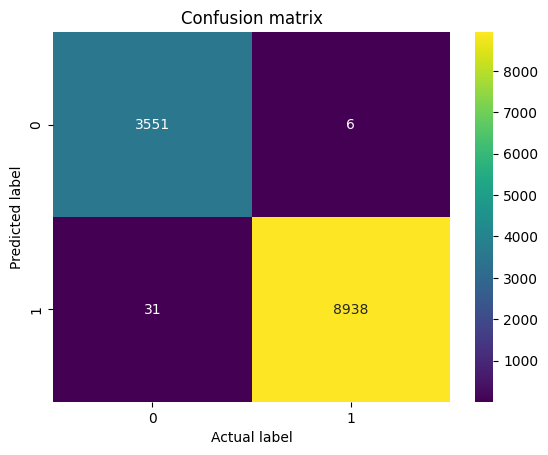

In [18]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

TN, FP = cm[0]
FN, TP = cm[1]

accuracy = accuracy_score([1] * TP + [0] * TN + [1] * FP + [0] * FN, [1] * (TP + FP) + [0] * (TN + FN))

precision = precision_score([1] * TP + [0] * FN + [1] * FP + [0] * TN, [1] * (TP + FP) + [0] * (TN + FN))

recall = recall_score([1] * TP + [0] * FN + [1] * FP + [0] * TN, [1] * (TP + FP) + [0] * (TN + FN))

f1 = f1_score([1] * TP + [0] * FN + [1] * FP + [0] * TN, [1] * (TP + FP) + [0] * (TN + FN))

print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Akurasi: 0.9990
Presisi: 0.9993
Recall: 0.9993
F1-Score: 0.9993
